In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


%matplotlib inline

In [ ]:

def gap_adjustment(y_channel, a=3, b=3):

    he_img = cv2.equalizeHist(y_channel)

    # Initialize the adjusted image
    adjusted_img = np.zeros_like(he_img, dtype=np.uint8)

    # Calculate CDF of the HE image
    hist, _ = np.histogram(he_img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    # Implementing the gap adjustment logic
    for i in range(1, 256):
        # Calculate the limiting gap for the current gray value
        limiting_gap = a * ((i / 127) - 1) ** 2 + b

        # Find the corresponding gray value in the HE image that matches the limiting gap
        gray_value = np.searchsorted(cdf_normalized, limiting_gap)

        # Assign the adjusted gray value
        adjusted_img[he_img == i] = gray_value

    return adjusted_img



# **CLAHE with HE**

In [13]:


data_dir ='datasets'

folders = os.listdir(f"{data_dir}/face_lowlight")

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12,12))

for folder in folders:
  images = os.listdir(f"{data_dir}/face_lowlight/{folder}")
  if not os.path.exists(f"{data_dir}/face_enhanced/{folder}"):
    os.makedirs(f"{data_dir}/face_enhanced/{folder}")
  for image_name in images:
    image = cv2.imread(f'{data_dir}/face_lowlight/{folder}/{image_name}')

    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # histogram_orig = cv2.calcHist([gray_img], [0], None, [256], [0, 256]).ravel()

    # axes[0,0].imshow(image)
    # axes[0,1].plot(histogram_orig)


    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_img)
    # histogram_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256]).ravel()

    # axes[0,1].imshow(cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR))
    # axes[0,3].plot(histogram_equalized)

    enhanced_image = clahe.apply(equalized_image)
    # histogram_enhanced = cv2.calcHist([enhanced_image], [0], None, [256], [0, 256]).ravel()
    # enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2BGR)

    # axes[1,0].imshow(enhanced_image)
    # axes[1,1].plot(histogram_enhanced)

    # clahe_image = clahe.apply(gray_img)
    # histogram_clahe = cv2.calcHist([clahe_image], [0], None, [256], [0, 256]).ravel()
    # clahe_image = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2BGR)
    # axes[1,1].imshow(clahe_image)
    # axes[1,3].plot(histogram_clahe)

    # name = images[i].split(".")[0]

    # if not os.path.exists(f"{data_dir}/face_enhanced"):
    #   os.makedirs(f"{data_dir}/enhanced_clahe")
    #   os.makedirs(f"{data_dir}/enhanced_cega")
    #   os.makedirs(f"{data_dir}/enhanced_cega_clahe")
    # print(image_name)
    cv2.imwrite(f"{data_dir}/face_enhanced/{folder}/{image_name}", equalized_image)
    # cv2.imwrite(f"{data_dir}/enhanced_cega_clahe/{name}.jpg", enhanced_image)
    # cv2.imwrite(f"{data_dir}/enhanced_clahe/{name}.jpg", clahe_image)

  # Ensure the layout is properly managed
  # plt.tight_layout()

  # Display the plot
  # plt.show()

Mark Zuckerberg1_1990.jpg
Mark Zuckerberg132_2002.jpg
Mark Zuckerberg206_2032.jpg
Mark Zuckerberg207_2033.jpg
Mark Zuckerberg133_2003.jpg
Mark Zuckerberg17_2019.jpg
Mark Zuckerberg153_2012.jpg
Mark Zuckerberg169_2018.jpg
Mark Zuckerberg5_2063.jpg
Mark Zuckerberg38_2054.jpg
Mark Zuckerberg62_2070.jpg
Mark Zuckerberg228_2042.jpg
Mark Zuckerberg75_2076.jpg
Mark Zuckerberg158_2014.jpg
Mark Zuckerberg68_2073.jpg
Mark Zuckerberg229_2043.jpg
Mark Zuckerberg235_2046.jpg
Mark Zuckerberg63_2071.jpg
Mark Zuckerberg112_1997.jpg
Mark Zuckerberg2_2029.jpg
Mark Zuckerberg74_2075.jpg
Mark Zuckerberg105_1991.jpg
Mark Zuckerberg83_2079.jpg
Mark Zuckerberg138_2005.jpg
Mark Zuckerberg167_2017.jpg
Mark Zuckerberg225_2041.jpg
Mark Zuckerberg29_2052.jpg
Mark Zuckerberg128_2001.jpg
Mark Zuckerberg135_2004.jpg
Mark Zuckerberg42_2057.jpg
Mark Zuckerberg224_2040.jpg
Mark Zuckerberg239_2047.jpg
Mark Zuckerberg28_2051.jpg
Mark Zuckerberg232_2045.jpg
Mark Zuckerberg50_2064.jpg
Mark Zuckerberg78_2077.jpg
Mark Zucker

In [ ]:
def transform_pixel_intensity(value, a, b):

  return round(a * ((value / 127.0) - 1)**2) + b

(720, 1080, 3)


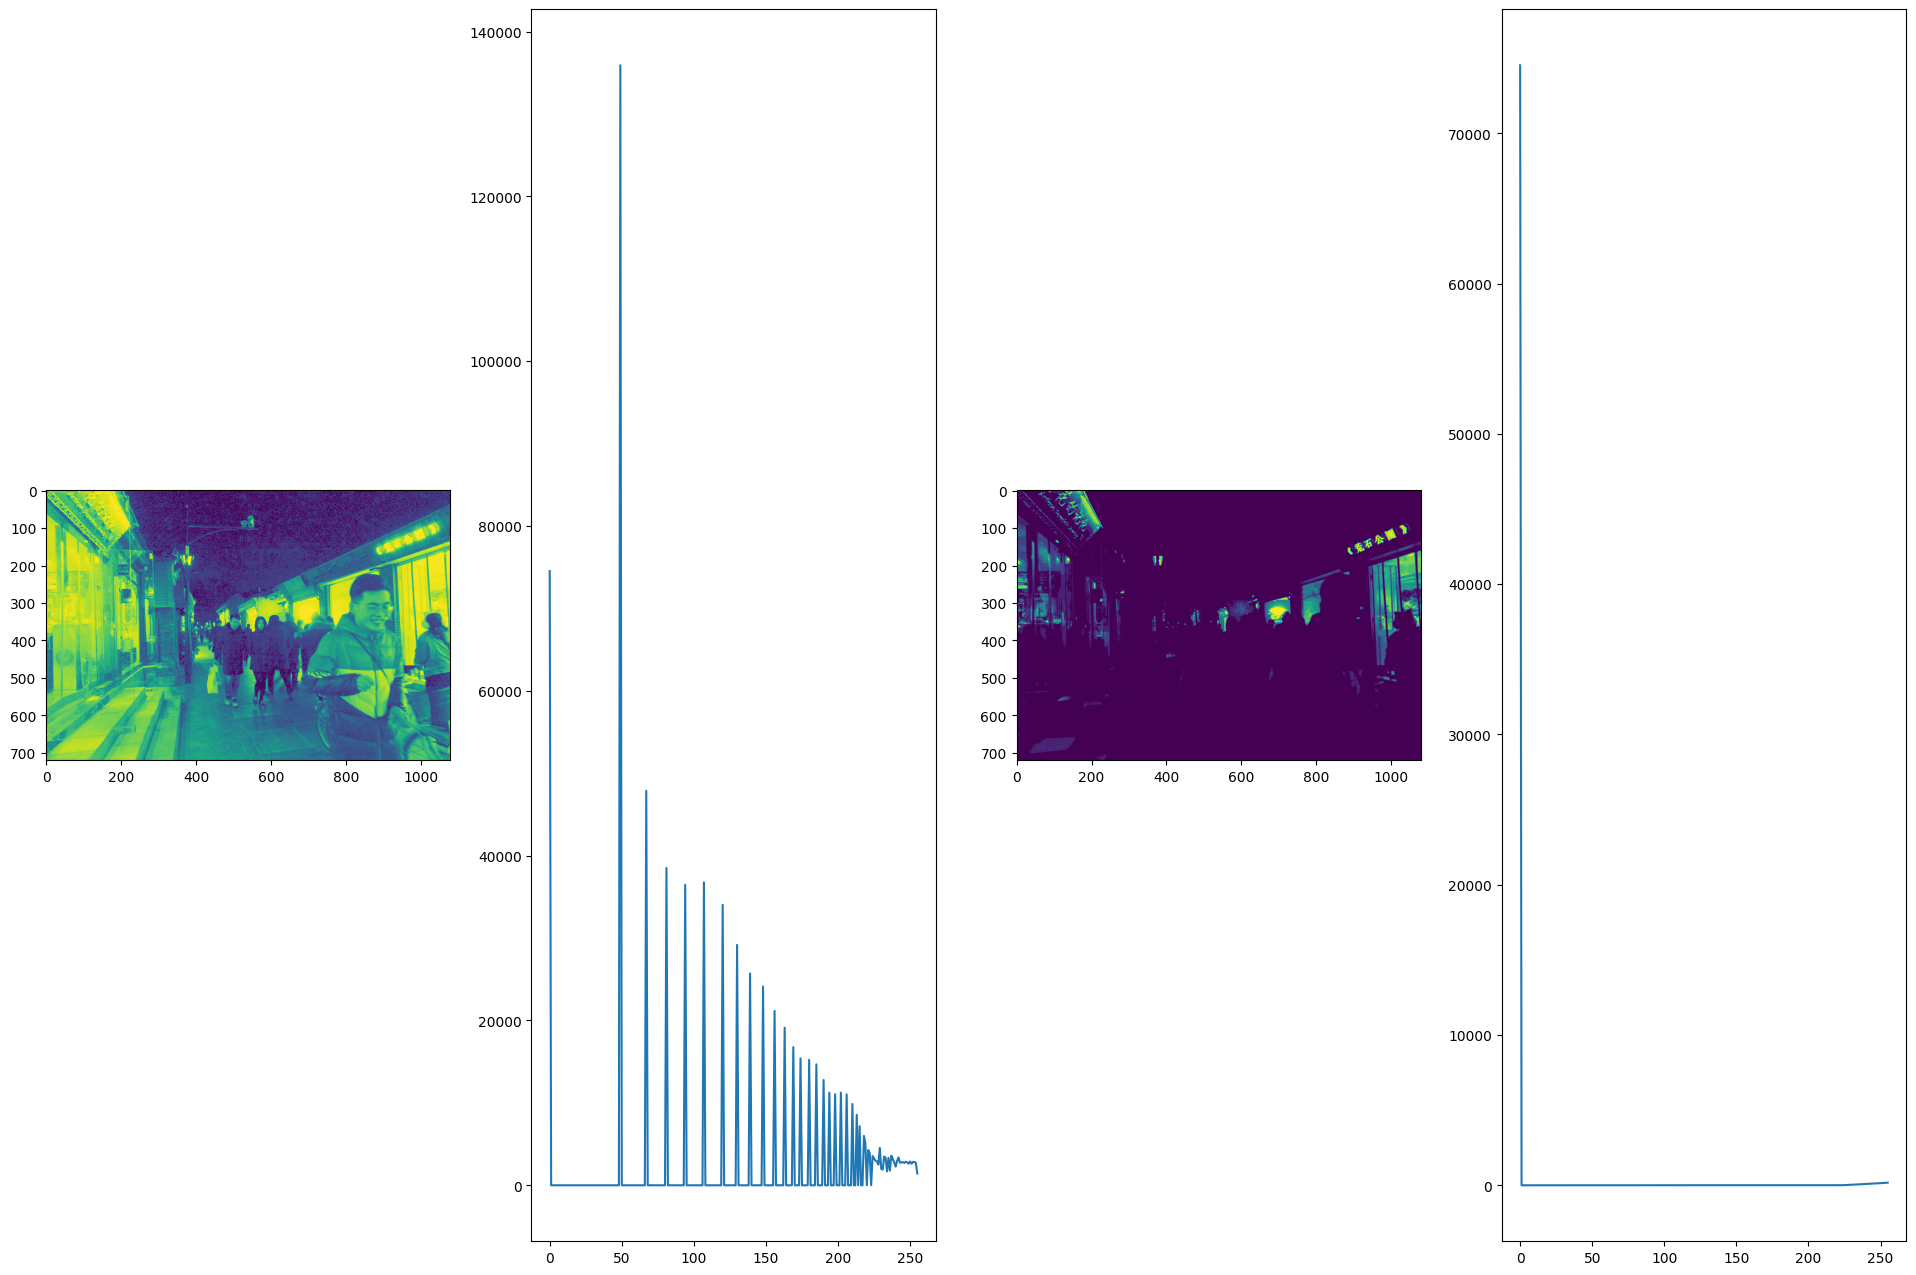

In [ ]:
import cv2
import numpy as np

fig , axes = plt.subplots(1, 4 , figsize=(24, 4*4))

def gap_limiter_function(G):
    return round(3 * ((G / 127.0) - 1)**2) + 3

def calculate_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist.ravel()

def adjust_histogram(hist):
    adjusted_hist = hist.copy()
    for x in range(1, len(hist)):
        d = adjusted_hist[x] - adjusted_hist[x - 1]
        Lx = gap_limiter_function(x)
        if d > Lx:

            adjusted_hist[x] -= d - Lx
    return adjusted_hist

def reconstruct_image(hist, image):
    cum_hist = np.cumsum(hist)
    cum_hist_normalized = cum_hist * float(255) / cum_hist[-1]
    new_image = np.interp(image.flatten(), range(256), cum_hist_normalized)
    return new_image.reshape(image.shape)

image = cv2.imread('/content/drive/Shareddrives/fyp/Datasets/dark_face/low_light/1.png')

print(image.shape)
image = cv2.cvtColor(image,  cv2.COLOR_BGR2GRAY)

equalized_image = cv2.equalizeHist(image)

hist = calculate_histogram(equalized_image)
adjusted_hist = adjust_histogram(hist)

axes[1].plot(hist)
axes[3].plot(adjusted_hist)


# Reconstruct the image
ga_image = reconstruct_image(adjusted_hist, equalized_image)

# Display the original and the GA image
# cv2.imshow('Original Image', image)
axes[0].imshow( equalized_image)
axes[2].imshow( ga_image.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


# Retinex

In [ ]:
def singleScaleRetinex(img, variance):

    retinex = np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), variance))
    # print(retinex)
    return retinex


In [ ]:
def SSR(img, variance):
    # crop = img[int((box[1]-box[3]/2)):int((box[1]+1.5*box[3])),int((box[0]-1.5*box[2])):int((box[0]+2.5*box[2]))]

    # crop = img[
    #     int((box[1] - box[3] / 4)) : int((box[1] + 1.25 * box[3])),
    #     int((box[0] - 0.25 * box[2])) : int((box[0] + 1.25 * box[2])),
    # ]

    # crop = img[int(box[1]):int((box[1]+box[3])), int(box[0]):int((box[0]+box[2]))]

    # imge=np.zeros([img.shape[0],img.shape[1],img.shape[2]])

    # imge[int((box[1]-box[3]/2)):int((box[1]+1.5*box[3])),int((box[0]-1.5*box[2])):int((box[0]+2.5*box[2]))] = np.float64(crop) + 1.0
    # imge[int((box[1]-box[3]/2)):int((box[1]+1.5*box[3])),int((box[0]-1.5*box[2])):int((box[0]+2.5*box[2]))] = np.float64(crop) + 1.0
    imge = np.float64(img) + 1.0
    img_retinex = singleScaleRetinex(imge, variance)

    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(
            np.int32(img_retinex[:, :, i] * 100), return_counts=True
        )
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.01:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.01:
                high_val = u / 100.0
                break
        img_retinex[:, :, i] = np.maximum(
            np.minimum(img_retinex[:, :, i], high_val), low_val
        )

        img_retinex[:, :, i] = (
            (img_retinex[:, :, i] - np.min(img_retinex[:, :, i]))
            / (np.max(img_retinex[:, :, i]) - np.min(img_retinex[:, :, i]))
            * 255
        )
    img_retinex = np.uint8(img_retinex)

    # img_ret = np.array(img_retinex)
    # print(img_ret)

    ori_img = np.array(img)
    # print(ori_img.shape)

    # ori_img[
    #     int((box[1] - box[3] / 4)) : int((box[1] + 1.25 * box[3])),
    #     int((box[0] - 0.25 * box[2])) : int((box[0] + 1.25 * box[2])),
    # ] = img_retinex

    # ori_img[int((box[1]-box[3]/2)):int((box[1]+1.5*box[3])),int((box[0]-1.5*box[2])):int((box[0]+2.5*box[2]))] = img_retinex

    # print(ori_img[int((box[1]-box[3]/2)):int((box[1]+1.5*box[3])),int((box[0]-box[2]/2)):int((box[0]+1.5*box[2]))])
    print(ori_img)
    # img_1 = Image.fromarray(ori_img)
    # m=cv2.imwrite('img',ori_img)
    # print(img.shape)
    # print(ori_img.shape)
    return img_retinex

In [ ]:

def template(img, variance):
    # crop = img[
    #     int(box[1]) : int((box[1] + box[3])), int(box[0]) : int((box[0] + box[2]))
    # ]

    imge = np.float64(img) + 1.0
    img_retinex = singleScaleRetinex(imge, variance)

    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(
            np.int32(img_retinex[:, :, i] * 100), return_counts=True
        )
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.01:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.01:
                high_val = u / 100.0
                break
        img_retinex[:, :, i] = np.maximum(
            np.minimum(img_retinex[:, :, i], high_val), low_val
        )

        img_retinex[:, :, i] = (
            (img_retinex[:, :, i] - np.min(img_retinex[:, :, i]))
            / (np.max(img_retinex[:, :, i]) - np.min(img_retinex[:, :, i]))
            * 255
        )
    img_retinex = np.uint8(img_retinex)

    return img_retinex


In [ ]:
def optimized_template(img, variance):
    imge = np.float64(img) + 1.0
    img_retinex = singleScaleRetinex(imge, variance)

    # Vectorize the normalization and contrast stretching
    min_val = np.min(img_retinex, axis=(0, 1), keepdims=True)
    max_val = np.max(img_retinex, axis=(0, 1), keepdims=True)

    # Avoid division by zero and scale to 255
    scale = 255 / (max_val - min_val)
    img_retinex = np.clip((img_retinex - min_val) * scale, 0, 255).astype(np.uint8)

    return img_retinex

['IMG_4129.jpg', 'IMG_4126.jpg', 'IMG_4110.jpg', 'IMG_4109.jpg', 'IMG_4108.jpg', 'IMG_4107.jpg', 'IMG_4101.jpg', 'IMG_4096.jpg', 'IMG_4055.jpg', 'IMG_4053.jpg', 'IMG_4052.jpg', 'IMG_4051.jpg', 'IMG_4050.jpg', 'IMG_1.jpg']
(3024, 4032, 3)
(3024, 4032, 3)
127.27544989510722


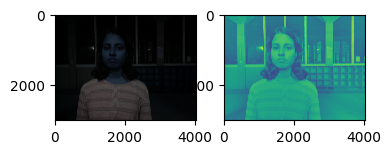

In [ ]:
# Read and convert the image to grayscale

img1 = '/content/drive/Shareddrives/fyp/Datasets/dark_face/low_light/1.png'
img2 = '/content/DALL·E 2023-12-10 13.30.05 - A diagram illustrating the process of the LLAMA Index. The image should depict a flowchart with several steps, starting from data collection, moving t.png'
data_dir ='/content/drive/Shareddrives/fyp/Datasets/Custom Dataset'

images = os.listdir(f"{data_dir}/Low light 4")
images = sorted(images, reverse=True)
print(images)

fig, axes = plt.subplots(1,2,figsize=(4,4*2))
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12,12))


for i in range( 3, 4):
  image = cv2.imread(f'{data_dir}/Low light 4/{images[i]}')
  print(image.shape)
  # image = cv2.resize(image, (1024,1024))
  print(image.shape)


# fig, axes = plt.subplots(1,2,figsize=(12,12))
  # image = cv2.imread(img1)
  axes[0].imshow(image)

  img = optimized_template(image, 300)
  print(img.mean())
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  if not os.path.exists(f"{data_dir}/enhanced_ssr"):
    os.mkdir(f"{data_dir}/enhanced_ssr")

  cv2.imwrite(f"{data_dir}/enhanced_ssr/{images[i].split('.')[0]}.jpg", img)
  axes[1].imshow(img)